# Load Libraries

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

import os;

from PIL import Image
from skimage.transform import resize

# Global Paths

In [9]:
path_root = '/home/ygala/TFM_UOC/'
path_data = os.path.join(path_root, 'data', 'covid_images')
output_path = os.path.join(input_path, 'data/processed/')

# Global Parameters

In [30]:
input_shape = (224, 224, 3)

# Visualize an Image

In [2]:
# specify your image path
ds = dicom.dcmread(os.path.join('D:covid/ANONYMIZED_NEW/ST_1002_ACC00005705/1.3.46.670589.30.36.0.1.18774111139.1585120909244.3.DC3'))
plt.imshow( ds.pixel_array)
plt.show()

# Image Pre-processing


In [ ]:
ds = dicom.dcmread('D:covid/ANONYMIZED_NEW/ST_1002_ACC00005705/1.3.46.670589.30.36.0.1.18774111139.1585120909244.3.DC3')
pixel_array_numpy = ds.pixel_array
# Extract metadata
cv2.imwrite('/home/ygala/TFM_UOC/test.png', pixel_array_numpy)

ds.data_element
os.listdir(images_path)[0]

# make it True if you want in PNG format
PNG = False# Specify the .dcm folder path
folders = os.listdir(images_path)# list of attributes available in dicom image
# download this file from the given link # https://github.com/vivek8981/DICOM-to-JPGdicom_image_description = pd.read_csv("dicom_image_description.csv")
dicom_image_description = pd.read_csv(os.path.join(input_path, "dicom_image_description.csv"))

counter = 1
with open('Patient_Detail.csv', 'w', newline ='') as csvfile:
    fieldnames = list(dicom_image_description["Description"])
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(fieldnames)
    for n1, folder in enumerate(folders):                                         
        images = os.listdir(os.path.join(images_path, folder))                                           
        for n2, image in enumerate(images):
            # print log
            print("Folder %d - File %d" % (n1, counter))    
            
            try:
                # Read image
                ds = dicom.dcmread(os.path.join(images_path, folder, image))

                ### Convert image
                shape = ds.pixel_array.shape

                # Convert to float to avoid overflow or underflow losses.
                image_2d = ds.pixel_array.astype(float)

                # Rescaling grey scale between 0-255
                image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0

                # Convert to uint
                image_2d_scaled = np.uint8(image_2d_scaled)

                # Write the PNG file
                with open(os.path.join(output_path, str(counter) + '.png'), 'wb') as png_file:
                    w = png.Writer(shape[1], shape[0], greyscale=True)
                    w.write(png_file, image_2d_scaled)


                # Extract metadata
                rows = []
                for field in fieldnames:
                    try:
                        x = str(ds.data_element(field)).replace("'", "")
                        y = x.find(":")
                        x = x[y+2:]
                        rows.append(x)
                    except:
                        rows.append('')                   
                writer.writerow(rows)
            except:
                print("Error converting image.")
            # Update counter
            counter += 1            

# Load Data

## Case Features

In [31]:
case_features = pd.read_csv(os.path.join(path_data, 'metadata.csv'));
case_features = case_features[~case_features.survival.isna()];
images_list = list(case_features.filename)
case_features

patientid  offset  sex   age       finding survival intubated went_icu  \
0            2     0.0    M  65.0      COVID-19        Y       NaN      NaN   
1            2     3.0    M  65.0      COVID-19        Y       NaN      NaN   
2            2     5.0    M  65.0      COVID-19        Y       NaN      NaN   
3            2     6.0    M  65.0      COVID-19        Y       NaN      NaN   
9            3     4.0    M  74.0          SARS        N       NaN      NaN   
..         ...     ...  ...   ...           ...      ...       ...      ...   
195        101     NaN    F  40.0  Pneumocystis        N       NaN      NaN   
196        101     NaN    F  40.0  Pneumocystis        N       NaN      NaN   
209        112     0.0  NaN   NaN      COVID-19        Y       NaN      NaN   
210        112     7.0  NaN   NaN      COVID-19        Y       NaN      NaN   
225        118     3.0    F  71.0      COVID-19        Y       NaN      NaN   

    needed_supplemental_O2 extubated  ...              date  \
0                      NaN       NaN  ...  January 22, 2020   
1                      NaN       NaN  ...  January 25, 2020   
2                      NaN       NaN  ...  January 27, 2020   
3                      NaN       NaN  ...  January 28, 2020   
9                      NaN       NaN  ...              2004   
..                     ...       ...  ...               ...   
195                    NaN       NaN  ...              2014   
196                    NaN       NaN  ...              2014   
209                    NaN       NaN  ...              2020   
210                    NaN       NaN  ...              2020   
225                    NaN       NaN  ...              2020   

                                           location  folder  \
0       Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
1       Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
2       Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
3       Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
9    Mount Sinai Hospital, Toronto, Ontario, Canada  images   
..                                              ...     ...   
195                                    Cairo, Egypt  images   
196                                    Cairo, Egypt  images   
209                                             NaN  images   
210                                             NaN  images   
225                                           Italy  images   

                                              filename                   doi  \
0    auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
1    auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
2    auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
3    auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
9    SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....  10.1148/rg.242035193   
..                                                 ...                   ...   
195           pneumocystis-jirovecii-pneumonia-3-2.jpg                   NaN   
196           pneumocystis-jirovecii-pneumonia-3-3.jpg                   NaN   
209  1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...                   NaN   
210  1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...                   NaN   
225          53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg                   NaN   

                                                   url      license  \
0    https://www.nejm.org/doi/full/10.1056/NEJMc200...          NaN   
1    https://www.nejm.org/doi/full/10.1056/NEJMc200...          NaN   
2    https://www.nejm.org/doi/full/10.1056/NEJMc200...          NaN   
3    https://www.nejm.org/doi/full/10.1056/NEJMc200...          NaN   
9       https://pubs.rsna.org/doi/10.1148/rg.242035193          NaN   
..                                                 ...          ...   
195  https://radiopaedia.org/cases/pneumocystis-jir...  CC BY-NC-SA   
196  https://

In [31]:
case_features = pd.read_csv(os.path.join(path_data, 'metadata.csv'));
case_features = case_features[~case_features.survival.isna()];
images_list = list(case_features.filename)
case_features

patientid  offset  sex   age       finding survival intubated went_icu  \
0            2     0.0    M  65.0      COVID-19        Y       NaN      NaN   
1            2     3.0    M  65.0      COVID-19        Y       NaN      NaN   
2            2     5.0    M  65.0      COVID-19        Y       NaN      NaN   
3            2     6.0    M  65.0      COVID-19        Y       NaN      NaN   
9            3     4.0    M  74.0          SARS        N       NaN      NaN   
..         ...     ...  ...   ...           ...      ...       ...      ...   
195        101     NaN    F  40.0  Pneumocystis        N       NaN      NaN   
196        101     NaN    F  40.0  Pneumocystis        N       NaN      NaN   
209        112     0.0  NaN   NaN      COVID-19        Y       NaN      NaN   
210        112     7.0  NaN   NaN      COVID-19        Y       NaN      NaN   
225        118     3.0    F  71.0      COVID-19        Y       NaN      NaN   

    needed_supplemental_O2 extubated  ...              date  \
0                      NaN       NaN  ...  January 22, 2020   
1                      NaN       NaN  ...  January 25, 2020   
2                      NaN       NaN  ...  January 27, 2020   
3                      NaN       NaN  ...  January 28, 2020   
9                      NaN       NaN  ...              2004   
..                     ...       ...  ...               ...   
195                    NaN       NaN  ...              2014   
196                    NaN       NaN  ...              2014   
209                    NaN       NaN  ...              2020   
210                    NaN       NaN  ...              2020   
225                    NaN       NaN  ...              2020   

                                           location  folder  \
0       Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
1       Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
2       Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
3       Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
9    Mount Sinai Hospital, Toronto, Ontario, Canada  images   
..                                              ...     ...   
195                                    Cairo, Egypt  images   
196                                    Cairo, Egypt  images   
209                                             NaN  images   
210                                             NaN  images   
225                                           Italy  images   

                                              filename                   doi  \
0    auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
1    auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
2    auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
3    auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
9    SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....  10.1148/rg.242035193   
..                                                 ...                   ...   
195           pneumocystis-jirovecii-pneumonia-3-2.jpg                   NaN   
196           pneumocystis-jirovecii-pneumonia-3-3.jpg                   NaN   
209  1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...                   NaN   
210  1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...                   NaN   
225          53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg                   NaN   

                                                   url      license  \
0    https://www.nejm.org/doi/full/10.1056/NEJMc200...          NaN   
1    https://www.nejm.org/doi/full/10.1056/NEJMc200...          NaN   
2    https://www.nejm.org/doi/full/10.1056/NEJMc200...          NaN   
3    https://www.nejm.org/doi/full/10.1056/NEJMc200...          NaN   
9       https://pubs.rsna.org/doi/10.1148/rg.242035193          NaN   
..                                                 ...          ...   
195  https://radiopaedia.org/cases/pneumocystis-jir...  CC BY-NC-SA   
196  https://

In [33]:
case_features.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'survival', 'intubated',
       'went_icu', 'needed_supplemental_O2', 'extubated', 'temperature',
       'pO2_saturation', 'leukocyte_count', 'neutrophil_count',
       'lymphocyte_count', 'view', 'modality', 'date', 'location', 'folder',
       'filename', 'doi', 'url', 'license', 'clinical_notes', 'other_notes',
       'Unnamed: 26'],
      dtype='object')

## Select target

In [18]:
# Cast turget to numeric
y_train = (case_features.survival.values == 'N').astype(int)

# Check target distribution
unique, counts = np.unique(y_train, return_counts=True)

print (np.asarray((unique, counts)).T)

[[ 0 73]
 [ 1 13]]


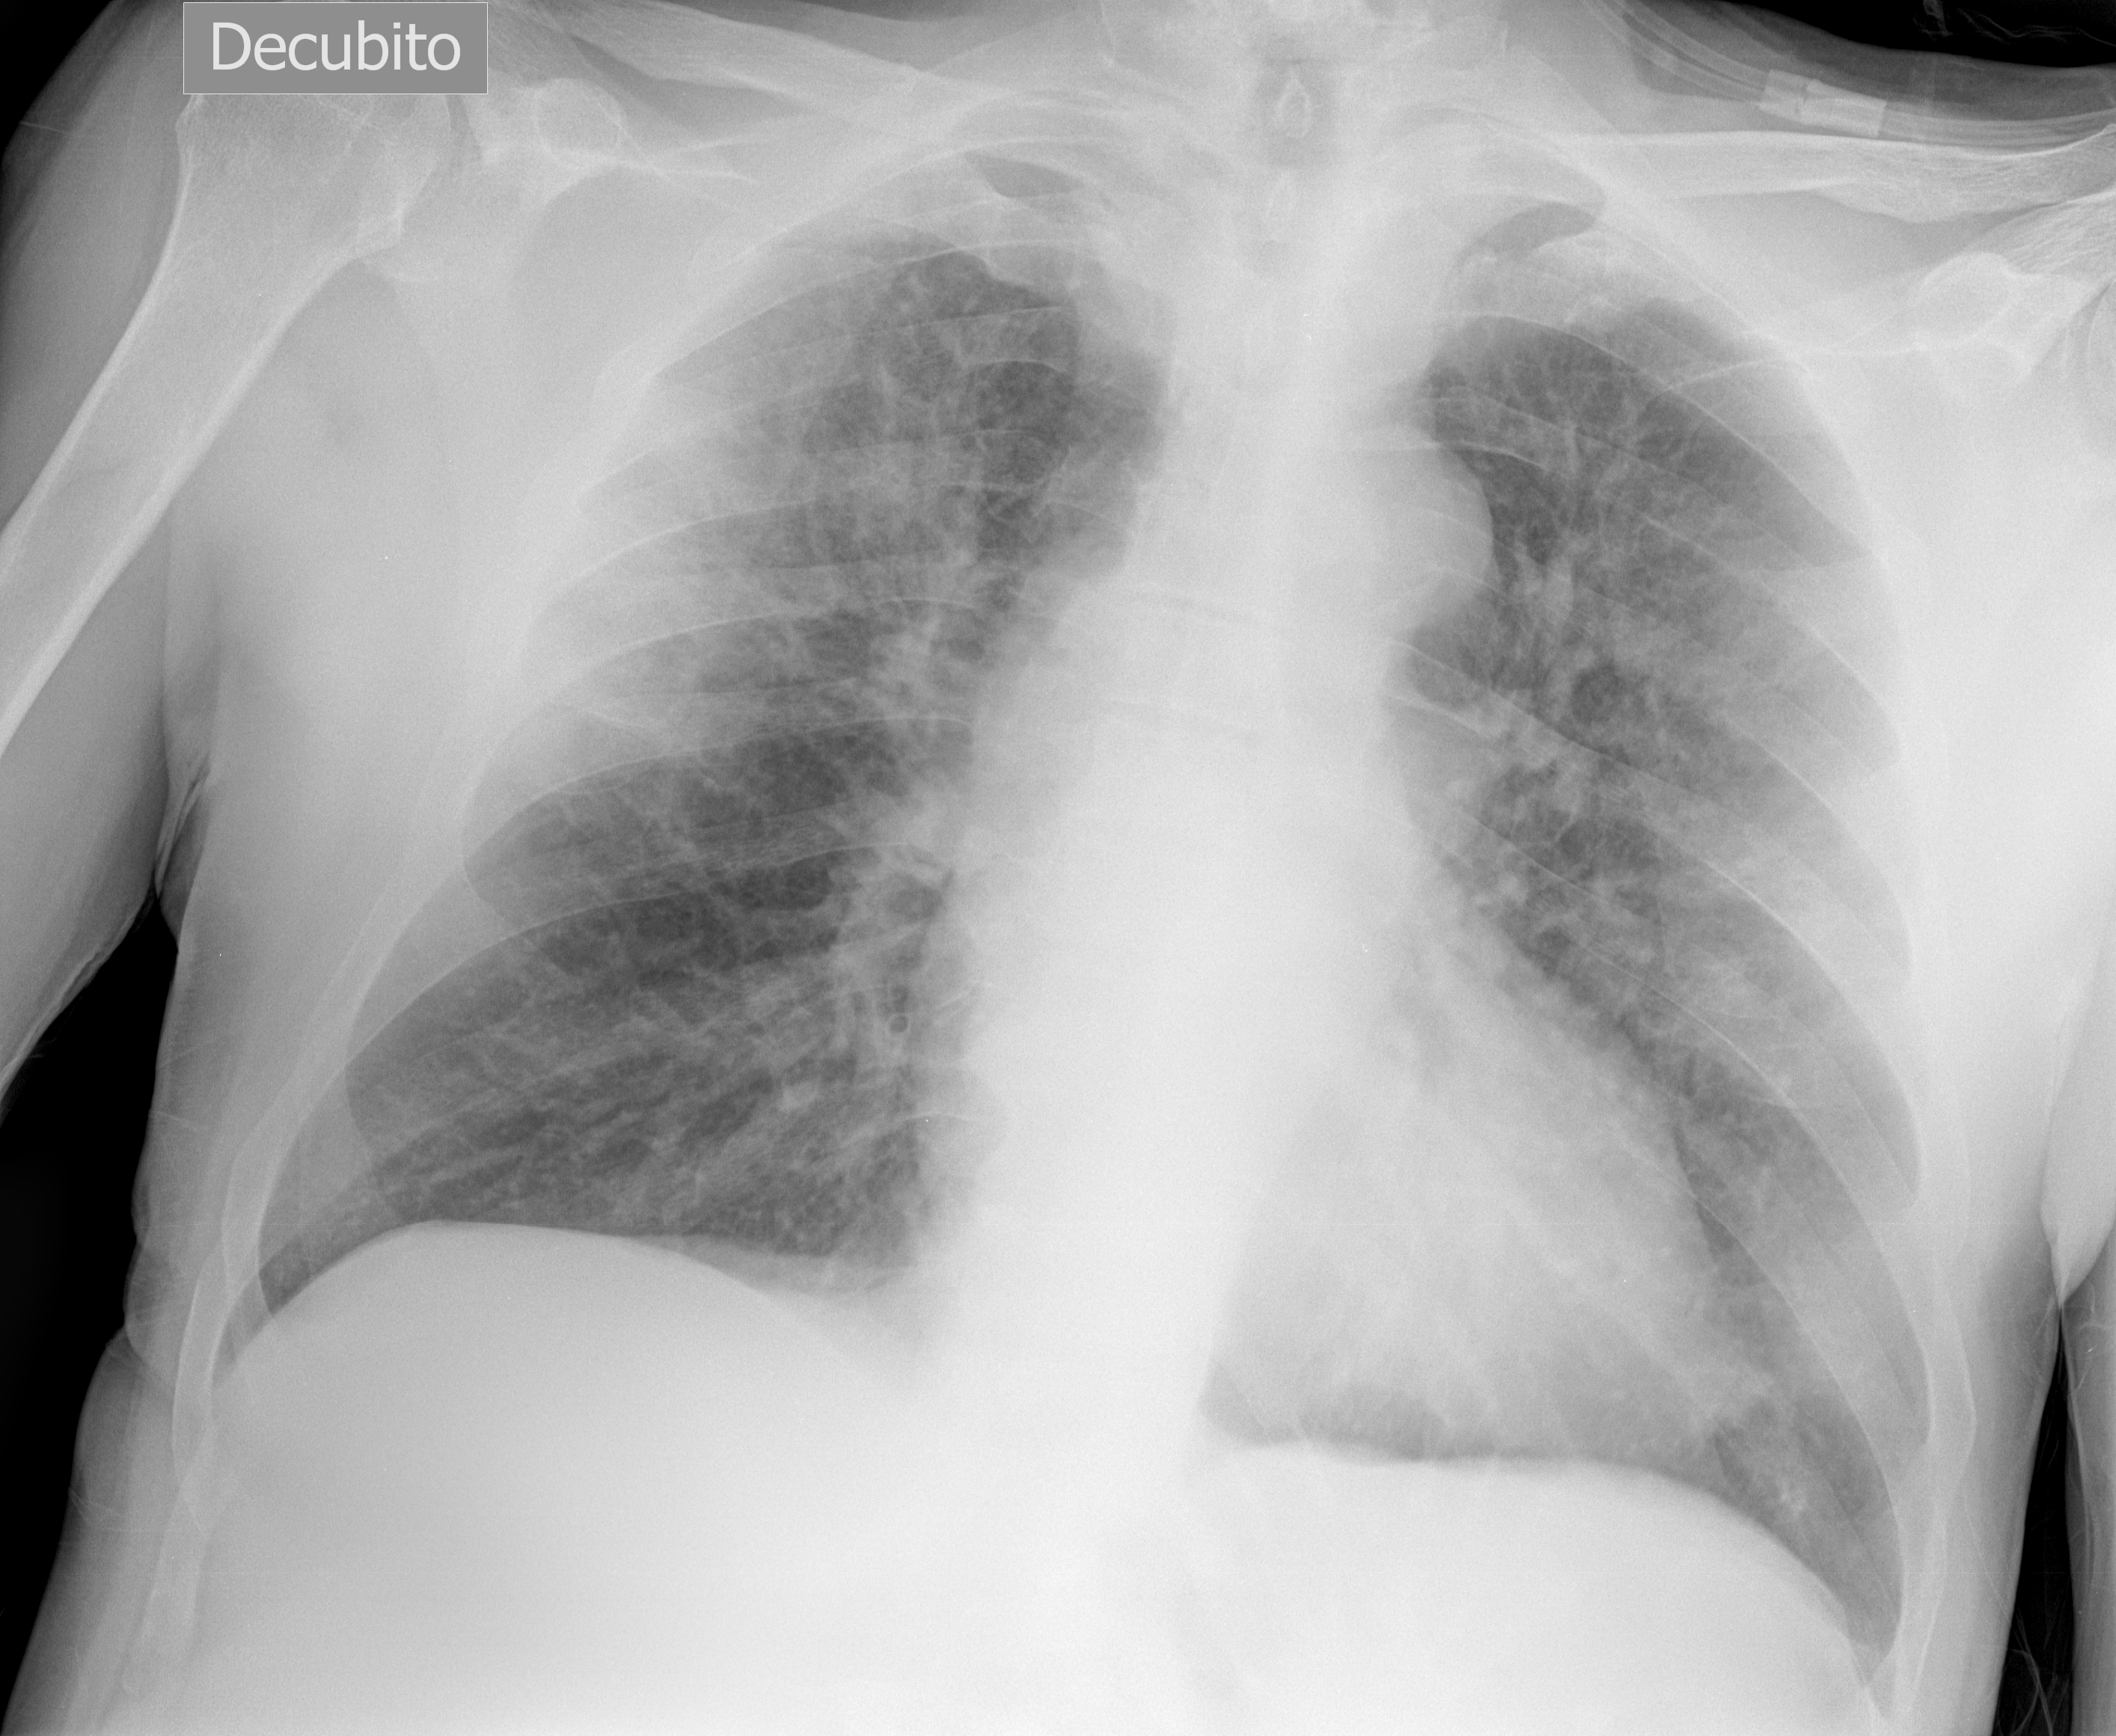

In [83]:
# Visualize one image
image_path = os.path.join(path_data, 'processed','500380.png')
image = Image.open(image_path)
image

# Data Pre-processing

In [38]:
### Transform images into arrays
X = []
for i in range(case_features.shape[0]):
    # print('%0.2f%%' % float(i/case_features.shape[0]))
    image_path = os.path.join(path_data, 'images', case_features.iloc[i].filename)
    image = Image.open(image_path)
    image = np.asarray(image.convert("RGB"))
    image = resize(image,  input_shape)
    X.append(image)

X = np.stack(X, axis = 0)
print(X.shape)

(86, 224, 224, 3)
